In [3]:
import pandas as pd

df_baseline = pd.read_csv("../../outputs/target_curated_dataset/outputs/rounds/2023-05-30/experiment_1/metrics.csv")
df_ours = pd.read_csv("../../outputs/target_curated_dataset/outputs/rounds/2023-05-30/experiment_0/metrics.csv")
df_ours_pos = pd.read_csv("../../outputs/target_curated_dataset/outputs/rounds/2023-05-30/experiment_2/metrics.csv")


In [6]:
baseline_min = df_baseline.groupby(["prompt_idx", "round"])["target_img_sim"].min().groupby("round").mean()
baseline_mean = df_baseline.groupby(["prompt_idx", "round"])["target_img_sim"].mean().groupby("round").mean()
baseline_max = df_baseline.groupby(["prompt_idx", "round"])["target_img_sim"].max().groupby("round").mean()

ours_min = df_ours.groupby(["prompt_idx", "round"])["target_img_sim"].min().groupby("round").mean()
ours_mean = df_ours.groupby(["prompt_idx", "round"])["target_img_sim"].mean().groupby("round").mean()
ours_max = df_ours.groupby(["prompt_idx", "round"])["target_img_sim"].max().groupby("round").mean()

ours_pos_min = df_ours_pos.groupby(["prompt_idx", "round"])["target_img_sim"].min().groupby("round").mean()
ours_pos_mean = df_ours_pos.groupby(["prompt_idx", "round"])["target_img_sim"].mean().groupby("round").mean()
ours_pos_max = df_ours_pos.groupby(["prompt_idx", "round"])["target_img_sim"].max().groupby("round").mean()

In [ ]:
max_prompt_idx = min(df_baseline["prompt_idx"].max(), df_ours["prompt_idx"].max(), df_ours_pos["prompt_idx"].max())
df_baseline = df_baseline.loc[df_baseline["prompt_idx"] <= max_prompt_idx]
df_ours = df_ours.loc[df_ours["prompt_idx"] <= max_prompt_idx]
df_ours_pos = df_ours_pos.loc[df_ours_pos["prompt_idx"] <= max_prompt_idx]

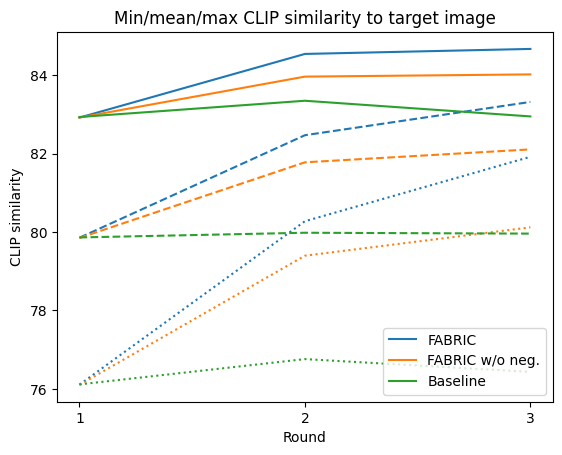

In [14]:
import matplotlib.pyplot as plt
import numpy as np

ts = np.arange(len(baseline_min)) + 1

plt.plot(ts, ours_max, label="FABRIC", linestyle="solid", color="C0")
plt.plot(ts, ours_mean, linestyle="dashed", color="C0")
plt.plot(ts, ours_min, linestyle="dotted", color="C0")

plt.plot(ts, ours_pos_max, label="FABRIC w/o neg.", linestyle="solid", color="C1")
plt.plot(ts, ours_pos_mean, linestyle="dashed", color="C1")
plt.plot(ts, ours_pos_min, linestyle="dotted", color="C1")

plt.plot(ts, baseline_max, label="Baseline", linestyle="solid", color="C2")
plt.plot(ts, baseline_mean, linestyle="dashed", color="C2")
plt.plot(ts, baseline_min, linestyle="dotted", color="C2")

plt.xticks(ts)
plt.xlabel("Round")
plt.ylabel("CLIP similarity")
plt.legend(loc="lower right")
plt.title("Min/mean/max CLIP similarity to target image")
plt.savefig("similarity_to_target.png", dpi=300, bbox_inches="tight")

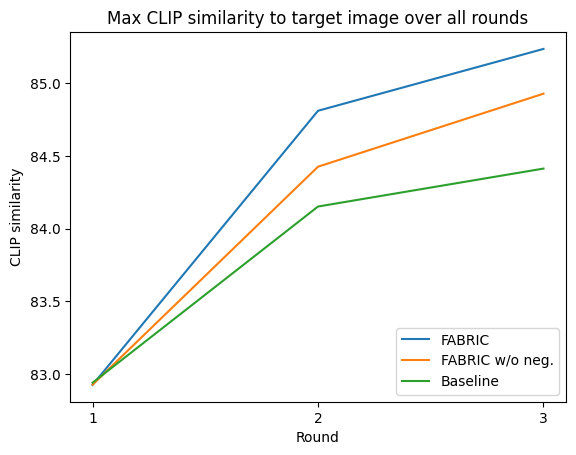

In [22]:
baseline_glob_max = [df_baseline.loc[df_baseline["round"] <= i].groupby(["prompt_idx"])["target_img_sim"].max().mean() for i in range(3)]
ours_pos_glob_max = [df_ours_pos.loc[df_ours_pos["round"] <= i].groupby(["prompt_idx"])["target_img_sim"].max().mean() for i in range(3)]
ours_glob_max = [df_ours.loc[df_ours["round"] <= i].groupby(["prompt_idx"])["target_img_sim"].max().mean() for i in range(3)]

ts = np.arange(len(baseline_min)) + 1
plt.plot(ts, ours_glob_max, label="FABRIC", linestyle="solid", color="C0")
plt.plot(ts, ours_pos_glob_max, label="FABRIC w/o neg.", linestyle="solid", color="C1")
plt.plot(ts, baseline_glob_max, label="Baseline", linestyle="solid", color="C2")

plt.xticks(ts)
plt.xlabel("Round")
plt.ylabel("CLIP similarity")
plt.legend(loc="lower right")
plt.title("Max CLIP similarity to target image over all rounds")
plt.savefig("max_similarity_to_target.png", dpi=300, bbox_inches="tight")

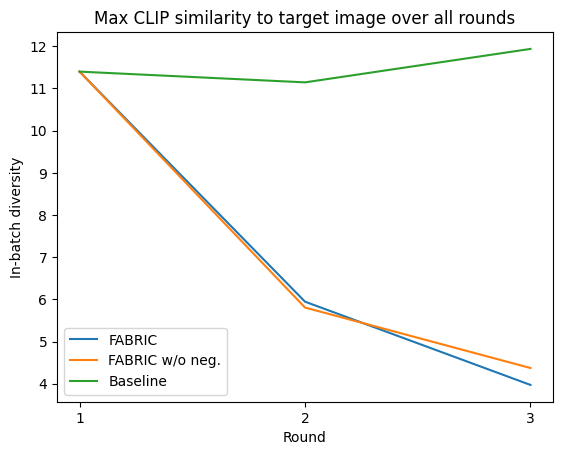

In [24]:
baseline_diversity = 100 - df_baseline.groupby("round")["round_diversity"].mean()
ours_diversity = 100 - df_ours.groupby("round")["round_diversity"].mean()
ours_pos_diversity = 100 - df_ours_pos.groupby("round")["round_diversity"].mean()

ts = np.arange(len(baseline_min)) + 1
plt.plot(ts, ours_diversity, label="FABRIC", linestyle="solid", color="C0")
plt.plot(ts, ours_pos_diversity, label="FABRIC w/o neg.", linestyle="solid", color="C1")
plt.plot(ts, baseline_diversity, label="Baseline", linestyle="solid", color="C2")

plt.xticks(ts)
plt.xlabel("Round")
plt.ylabel("In-batch diversity")
plt.legend()
plt.title("Max CLIP similarity to target image over all rounds")
plt.savefig("diversity.png", dpi=300, bbox_inches="tight")